<h1> Pengantar Metode Statistik</h1>

**Compiled by:** suprapto van plaosan

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/LearningBox-Suprapto/pms/blob/master/00_PMS.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

<center><h1><font color='orange'>Uji Hipotesis</h1></center>

Ketika ada dua data yang ingin dibandingkan, pertanyaan yang biasanya diajukan adalah: “Apakah kedua data tersebut berbeda?” Jawabannya diberikan oleh uji hipotesis: dengan uji-t jika data terdistribusi normal, atau dengan uji Mann-Whitney untuk data yang tidak terdistribusi normal. 
Jadi apa yang terjadi jika ada lebih dari dua kelompok?

Untuk menjawab pertanyaan "Apakah data-data tersebut berbeda?" untuk data yang lebih dari dua kelompok, Analysis of Variance (ANOVA) digunakan untuk data yang residualnya berdistribusi normal. Jika kondisi ini tidak terpenuhi maka harus dilakukan Uji Kruskal-Wallis.

Apa yang harus dilakukan jika ada data berpasangan?

Jika ada pasangan yang cocok untuk dua kelompok, dan perbedaannya tidak terdistribusi normal, dapat digunakan tes jumlah peringkat bertanda Wilcoxon. Uji peringkat untuk lebih dari dua kelompok data yang cocok adalah uji Friedman.

<h2><font color='orange'>Uji t</h2>

Uji-t, biasanya dilakukan untuk menemukan bukti perbedaan yang signifikan antara rata-rata populasi (2-sampel t) atau antara rata-rata populasi dan nilai yang dihipotesiskan (1-sampel t). Nilai-t mengukur ukuran perbedaan relatif terhadap variasi data sampel. Dengan kata lain, T hanyalah selisih yang dihitung yang direpresentasikan dalam satuan kesalahan standar. Semakin besar nilai T, semakin besar bukti yang melawan hipotesis nol. Artinya terdapat bukti yang lebih besar bahwa terdapat perbedaan yang signifikan. Semakin dekat T ke 0, semakin besar kemungkinan tidak ada perbedaan yang signifikan.

Nilai-t dalam output dihitung hanya dari satu sampel dari seluruh populasi. Jika diambil sampel data acak berulang dari populasi yang sama, akan didapatkan nilai-t yang sedikit berbeda setiap kali, karena kesalahan pengambilan sampel acak (yang sebenarnya bukan kesalahan apa pun – berupa variasi acak dalam data).

Dalam setiap percobaan, terdapat pengaruh atau perbedaan antar kelompok yang diuji oleh peneliti. Bisa jadi keefektifan obat baru, bahan bangunan, atau intervensi lain yang memiliki manfaat. Sayangnya bagi para peneliti, selalu ada kemungkinan tidak ada pengaruh, yaitu tidak ada perbedaan antar kelompok. Tidak adanya perbedaan yang signifikan ini disebut sebagai hipotesis nol.

Meskipun hipotesis nol benar, sangat mungkin bahwa akan ada efek dalam data sampel karena kesalahan pengambilan sampel acak. Faktanya, sangat tidak mungkin bahwa kelompok sampel akan pernah sama persis dengan nilai hipotesis nol. Akibatnya, posisinya adalah bahwa perbedaan yang diamati dalam sampel tidak mencerminkan perbedaan yang sebenarnya antar populasi.

Nilai P mengevaluasi seberapa baik data sampel mendukung argumen bahwa hipotesis nol benar. Ini mengukur seberapa kompatibel data dengan hipotesis nol. Seberapa besar kemungkinan efek yang diamati dalam data sampel jika hipotesis nol benar?

- Nilai P tinggi: kemungkinan besar data mengikuti hipotesis nol.
- Nilai P rendah: data tidak mungkin mengikuti hipotesis nol.


Nilai P yang rendah menunjukkan bahwa sampel memberikan cukup bukti bahwa hipotesis nol dapat ditolak untuk seluruh populasi.

Dalam istilah teknis, nilai P adalah probabilitas untuk memperoleh efek setidaknya sama ekstrimnya dengan yang ada dalam data sampel, dengan asumsi kebenaran hipotesis nol.

Misalnya, studi vaksin menghasilkan nilai P 0,04. Nilai P ini menunjukkan bahwa jika vaksin tidak berpengaruh, akan diperoleh perbedaan yang diamati lebih dari 4% penelitian karena kesalahan pengambilan sampel secara acak.

Nilai P hanya menjawab satu pertanyaan: seberapa besar kemungkinan, dengan asumsi hipotesis nol yang benar? 

Uji t di bawah ini mencoba menghitung nilai T dan p untuk data 'mean radius' dan 'mean area' dari dataset 'breast cancer'. Nilai p yang diperoleh di bawah 0.05 sehingga dikatakan 'tidak ada perbedaan signifikan' antara kedua data, dengan asumsi varians kedua data  

In [1]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

<img src='https://pingouin-stats.org/_images/flowchart_one_way_ANOVA.svg'>

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
sns.set(style='ticks',context='talk')
import matplotlib as mpl
mpl.rc('lines',linewidth=3)
mpl.rc('figure',figsize=(12,9))

In [3]:
import scipy.stats as stats
import numpy as np
x1=np.random.normal(0,1,1000)
x2=np.random.normal(0,1.2,1000)
x3=np.random.normal(5,10,1000)

In [4]:
import pandas as pd
df=pd.DataFrame([x1,x2,x3]).T
df.columns=['x1','x2','x3']
df.head(10)

,x1,x2,x3
0,-0.237200,-1.161396,10.957599
1,0.263055,0.573757,10.289020
2,2.385235,0.453459,-4.011924
3,1.574168,-0.384414,14.863702
4,1.675420,-0.478076,21.388317
5,-1.404823,0.116677,12.594385
6,-0.748661,-0.153257,14.257540
7,-0.084121,-1.706936,11.682015
8,-0.178261,-0.796731,12.824132
9,-0.985845,0.243168,-15.939106


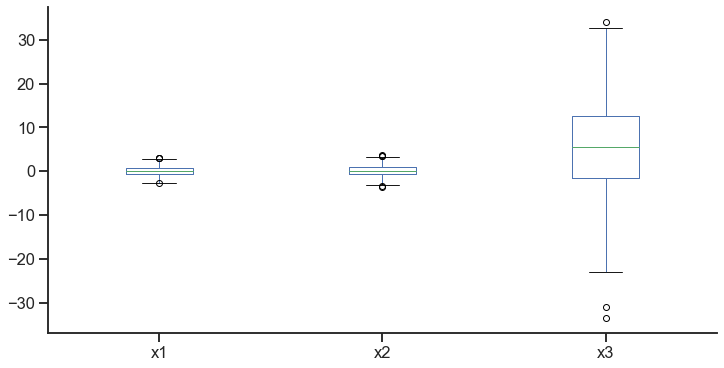

In [5]:
df.plot(kind='box', figsize=(12,6))
sns.despine();

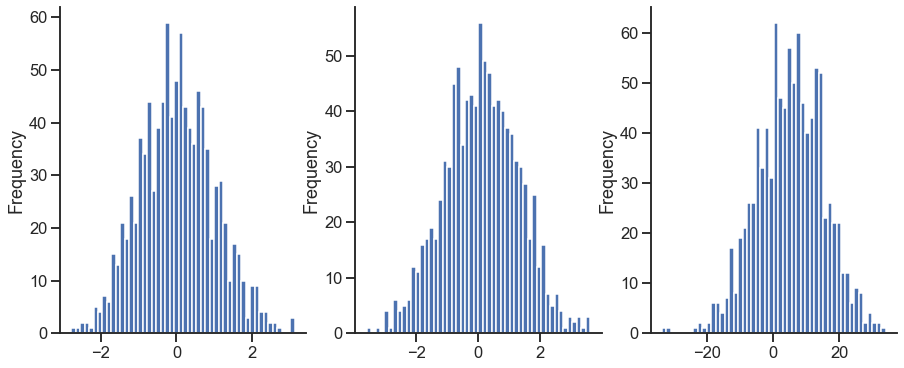

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.subplot(131)
df.x1.plot(kind='hist', bins=50)
sns.despine()
plt.subplot(132)
df.x2.plot(kind='hist', bins=50)
sns.despine()
plt.subplot(133)
df.x3.plot(kind='hist', bins=50)
sns.despine();

           W      pval  normal
x1  0.998077  0.316306    True
ShapiroResult(statistic=0.9980767965316772, pvalue=0.31630608439445496)
AndersonResult(statistic=0.35005604927334844, critical_values=array([0.574, 0.653, 0.784, 0.914, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


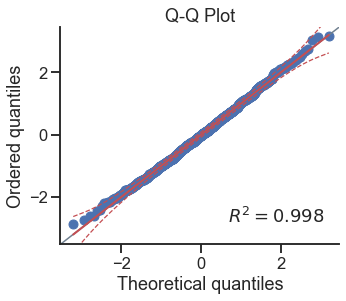

In [7]:
import pingouin as pq
from scipy.stats import shapiro, anderson
print(pq.normality(df.x1))
print(shapiro(df.x1))
print(anderson(df.x1))
pq.qqplot(df.x1)
sns.despine();

ShapiroResult(statistic=0.9990023970603943, pvalue=0.8744053840637207)
AndersonResult(statistic=0.14990431234650714, critical_values=array([0.574, 0.653, 0.784, 0.914, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


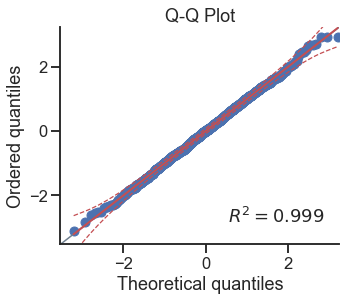

In [8]:
pq.normality(df.x2)
print(shapiro(df.x2))
print(anderson(df.x2))
pq.qqplot(df.x2)
sns.despine();

ShapiroResult(statistic=0.9980165362358093, pvalue=0.2896384298801422)
AndersonResult(statistic=0.3965368336471329, critical_values=array([0.574, 0.653, 0.784, 0.914, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


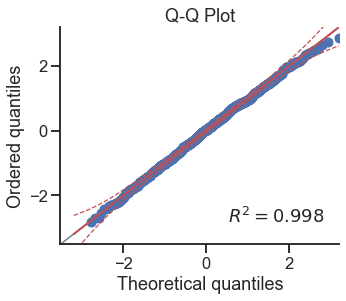

In [9]:
pq.normality(df.x3)
print(shapiro(df.x3))
print(anderson(df.x3))
pq.qqplot(df.x3)
sns.despine();

In [10]:
stats.ttest_ind(x1, x2)

Ttest_indResult(statistic=-1.4418496540698693, pvalue=0.1495015105356347)

In [11]:
stats.ttest_ind(x1, x3)

Ttest_indResult(statistic=-16.577642391783026, pvalue=6.244999462457894e-58)

Ketika digunakan analisis dengan variansi yang tidak sebanding, diperoleh nilai p sebagai berikut:

In [12]:
import numpy as np
import scipy.stats as stats

#define F-test function
def f_test(x, y):
    x = np.array(x)
    y = np.array(y)
    f = np.var(x, ddof=1)/np.var(y, ddof=1) #calculate F test statistic 
    dfn = x.size-1 #define degrees of freedom numerator 
    dfd = y.size-1 #define degrees of freedom denominator 
    p = 1-stats.f.cdf(f, dfn, dfd) #find p-value of F test statistic 
    return f, p

#perform F-test
f_test(x1, x3)

(0.009522799486142838, 1.0)

In [13]:
stats.ttest_ind(x1, x3, equal_var=True)

Ttest_indResult(statistic=-16.577642391783026, pvalue=6.244999462457894e-58)

In [14]:
import numpy as np
import scipy.stats as stats

#define F-test function
def f_test(x, y):
    x = np.array(x)
    y = np.array(y)
    f = np.var(x, ddof=1)/np.var(y, ddof=1) #calculate F test statistic 
    dfn = x.size-1 #define degrees of freedom numerator 
    dfd = y.size-1 #define degrees of freedom denominator 
    p = 1-stats.f.cdf(f, dfn, dfd) #find p-value of F test statistic 
    return f, p

#perform F-test
f_test(x1, x2)

(0.6689734772807815, 0.9999999998777316)

In [15]:
stats.ttest_ind(x1, x2, equal_var=True)

Ttest_indResult(statistic=-1.4418496540698693, pvalue=0.1495015105356347)

### Uji-t berpasangan

Ketika membandingkan dua kelompok satu sama lain, harus dibedakan antara dua kasus.

Dalam kasus pertama, membandingkan dua nilai yang direkam dari subjek yang sama pada dua waktu tertentu. Misalnya, pengukuran jumlah siswa saat mereka masuk sekolah dasar dan setelah tahun pertama mereka, dan periksa apakah mereka telah bertambah. Karena kita hanya tertarik pada perbedaan antara pengukuran pertama dan kedua, tes ini disebut uji-t berpasangan, dan pada dasarnya setara dengan uji-t satu sampel untuk perbedaan rata-rata.

Uji-t sampel berpasangan juga disebut uji-t sampel dependen. Ini adalah tes univariat yang menguji perbedaan yang signifikan antara 2 variabel terkait. Contohnya adalah jika Anda di mana mengumpulkan tekanan darah untuk seseorang sebelum dan sesudah beberapa perawatan, kondisi, atau titik waktu.

Hipotesis yang diuji adalah:

- Hipotesis nol (H0): ud = 0, yang berarti selisih rata-rata antara sampel 1 dan sampel 2 sama dengan 0.
- Hipotesis alternatif (HA): ud ≠ 0, yang berarti perbedaan rata-rata antara sampel 1 dan sampel 2 tidak sama dengan 0.

Jika nilai p kurang dari yang diuji, paling sering 0,05, hipotesis nol dapat ditolak.

**Asumsi Uji t Sampel**

Agar hasil uji-t sampel berpasangan dapat dipercaya, asumsi berikut harus dipenuhi:

- Variabel terikat (DV) harus kontinu yang diukur pada skala interval atau rasio
- Pengamatannya independen
- DV harus didistribusikan secara normal
- Uji-t sampel berpasangan kuat untuk pelanggaran ini. Jika terdapat pelanggaran normalitas, selama tidak dalam pelanggaran berat maka hasil tes dianggap valid
- DV tidak boleh mengandung pencilan yang signifikan

Jika salah satu asumsi ini dilanggar, pengujian yang berbeda harus digunakan. Sebuah alternatif untuk uji-t sampel berpasangan adalah Uji peringkat bertanda Wilcoxon.

**Data yang digunakan dalam contoh ini**

Data yang digunakan dalam contoh merupakan kumpulan data fabrikasi dan berisi pembacaan tekanan darah sebelum dan sesudah intervensi. Ini adalah variabel "bp_before" dan "bp_after".

In [16]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Opensourcefordatascience/Data-sets/master/blood_pressure.csv")
df[['bp_before','bp_after']].describe()

,bp_before,bp_after
count,120.000000,120.000000
mean,156.450000,151.358333
std,11.389845,14.177622
min,138.000000,125.000000
25%,147.000000,140.750000
50%,154.500000,149.500000
75%,164.000000,161.000000
max,185.000000,185.000000


<h2><font color='orange'>Uji T Sampel Berpasangan</h2>

Hal pertama yang perlu kita lakukan adalah mengimpor pustaka statistik dan kemudian menguji asumsi uji-t sampel berpasangan. Pertama, mari kita periksa pencilan yang signifikan di masing-masing variabel.

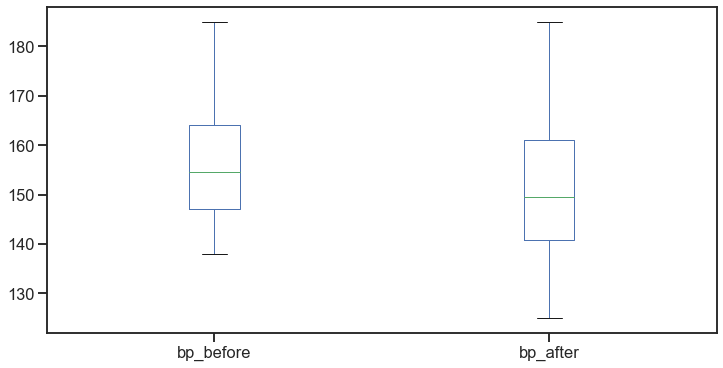

In [17]:
from scipy import stats
df[['bp_before','bp_after']].plot(kind='box', figsize=(12,6));

Tampaknya tidak ada pencilan yang signifikan dalam variabel. Sekarang untuk menguji bahwa data tersebut berasal dari distribusi normal. Ada dua cara untuk menguji asumsi ini - membuat histogram, dan / atau menggunakan uji statistik. Ayo lakukan keduanya.

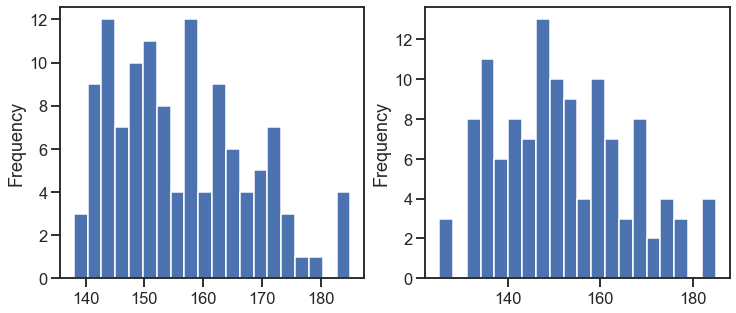

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.subplot(121)
df['bp_before'].plot(kind='hist', bins=20)
plt.subplot(122)
df['bp_after'].plot(kind='hist', bins=20);

Histogram data kami tampaknya tidak terdistribusi normal. Tampaknya ada kemiringan. Mari kita uji statistik ini untuk melihat apakah data terdistribusi normal. Untuk menguji ini, seseorang dapat menggunakan uji Shapiro-Wilk untuk normalitas. Sayangnya keluarannya tidak diberi label. Nilai pertama adalah nilai uji W, dan nilai kedua adalah nilai p.

In [19]:
stats.shapiro(df['bp_before'])

ShapiroResult(statistic=0.9547787308692932, pvalue=0.0004928423441015184)

In [20]:
stats.shapiro(df['bp_after'])

ShapiroResult(statistic=0.9740639328956604, pvalue=0.020227791741490364)

Kedua variabel tersebut melanggar asumsi normalitas dengan jumlah yang besar. Oleh karena itu, seseorang harus menggunakan tes yang berbeda untuk menganalisis data ini. Seperti yang disebutkan di awal, alternatif yang tepat untuk digunakan adalah Uji peringkat bertanda Wilcoxon. Namun, untuk tujuan demonstrasi, saya akan terus menggunakan uji-t sampel berpasangan. Perlu dicatat, bahwa temuan dari analisis ini tidak boleh dianggap valid karena banyaknya pelanggaran asumsi tentang normalitas.

Untuk melakukan uji-t sampel berpasangan, seseorang perlu menggunakan metode stats.ttest_rel ().

In [21]:
stats.ttest_rel(df['bp_before'], df['bp_after'])

Ttest_relResult(statistic=3.3371870510833657, pvalue=0.0011297914644840823)

Hasil uji t berpasangan signifikan secara statistik! Sehingga hipotesis nol dapat ditolak.

Komponen lain yang diperlukan untuk melaporkan hasil uji adalah derajat kebebasan (df). df dapat dihitung dengan mengambil jumlah total observasi berpasangan dikurangi 1. Dalam kasus ini, df = 120 - 1 = 119.

<strong><font color='orange'>Interpretasi Hasil</strong>

Uji-t sampel berpasangan digunakan untuk menganalisis tekanan darah sebelum dan sesudah intervensi untuk menguji apakah intervensi memiliki pengaruh yang signifikan pada tekanan darah. Tekanan darah sebelum intervensi lebih tinggi (156,45 ± 11,39 unit) dibandingkan tekanan darah pasca intervensi (151,36 ± 14,18 unit); ada penurunan tekanan darah yang signifikan secara statistik (t (119) = 3,34, p = 0,0011) sebesar 5,09 unit.

Catatan: Asumsi normalitas dilanggar, hasil tidak boleh dipercaya. Data harus dianalisis menggunakan Uji peringkat bertanda Wilcoxon.

<h2><font color='orange'>Uji-t Tidak Berpasangan</h2>
Tes kedua untuk membandingkan dua kelompok independen. Misalnya, membandingkan efek dari dua obat yang diberikan kepada dua kelompok pasien yang berbeda, dan membandingkan bagaimana kedua kelompok tersebut merespons. Ini disebut uji-t tidak berpasangan, atau uji-t untuk dua kelompok independen.

Jika ada dua sampel independen, varians dari selisih antara rata-rata mereka adalah jumlah dari varian yang terpisah, jadi kesalahan standar dari perbedaan rata-rata adalah akar kuadrat dari jumlah varian terpisah:

$$\begin{split}\begin{aligned}
   se({{\bar x}_1} - {{\bar x}_2}) &= \sqrt {\operatorname{var} ({{\bar x}_1}) + \operatorname{var} ({{\bar x}_2})}  \\
   &= \sqrt {{{\left\{ {se({{\bar x}_1})} \right\}}^2} + {{\left\{ {se({{\bar x}_2})} \right\}}^2}}  \\
   &= \sqrt {\frac{{s_1^2}}{{{n_1}}} + \frac{{s_2^2}}{{{n_2}}}}  \\\end{aligned}\end{split}$$

di mana x¯i adalah mean dari sampel ke-i, dan se menunjukkan kesalahan standar.

In [22]:
from scipy.stats import ttest_ind_from_stats
ttest_ind_from_stats(mean1=15.0, std1=np.sqrt(87.5), nobs1=13,
                     mean2=12.0, std2=np.sqrt(39.0), nobs2=11)

Ttest_indResult(statistic=0.9051358093310269, pvalue=0.3751996797581487)

In [23]:
from scipy import stats
np.random.seed(12345678) # fix random seed to get same numbers

rvs1 = stats.norm.rvs(loc=5,scale=10,size=500)
rvs2 = (stats.norm.rvs(loc=5,scale=10,size=500) +
        stats.norm.rvs(scale=0.2,size=500))
stats.ttest_rel(rvs1,rvs2)

Ttest_relResult(statistic=0.24101764965300979, pvalue=0.8096404344581155)

In [24]:
rvs3 = (stats.norm.rvs(loc=8,scale=10,size=500) +
        stats.norm.rvs(scale=0.2,size=500))
stats.ttest_rel(rvs1,rvs3)

Ttest_relResult(statistic=-3.9995108708727924, pvalue=7.308240219166128e-05)

<h2><font color='orange'>Pendekatan uji t lain</h2>

Dengan munculnya daya komputasi yang murah, pemodelan statistik telah menjadi bidang yang berkembang pesat. Hal ini juga memengaruhi analisis statistik klasik, karena sebagian besar masalah dapat dilihat dari dua perspektif: membuat hipotesis statistik, dan memverifikasi atau memalsukan hipotesis itu; atau membuat model statistik, dan menganalisis signifikansi parameter model.

Pengukuran performa dari tim balap, pada dua kesempatan berbeda. Selama Race_1, anggota tim mencapai skor [79., 100., 93., 75., 84., 107., 66., 86., 103., 81., 83., 89., 105 ., 84., 86., 86., 112., 112., 100., 94.], dan selama Race_2 [92., 100., 76., 97., 72., 79., 94., 71 ., 84., 76., 82., 57., 67., 78., 94., 83., 85., 92., 76., 88.].

Angka-angka ini dapat dibuat, dan uji-t yang membandingkan kedua grup dapat dilakukan, sebagai berikut:

In [25]:
from scipy import stats
np.random.seed(123)
race_1 = np.round(np.random.randn(20)*10+90)
race_2 = np.round(np.random.randn(20)*10+85)
(t, pVal) = stats.ttest_rel (race_1, race_2)
print('The probability that the two distributions are equal is {0}'.format(pVal))

The probability that the two distributions are equal is 0.032682085532223897


Perintah random.seed (123) menginisialisasi pembuat angka acak dengan angka 123, yang memastikan bahwa dua kode yang berjalan secara berurutan menghasilkan hasil yang sama, sesuai dengan angka yang diberikan di atas.

In [26]:
import pandas as pd
import statsmodels.formula.api as sm
np.random.seed(123)
df = pd.DataFrame({'Race1': race_1, 'Race2':race_2})
result = sm.ols(formula='I(Race2-Race1) ~ 1', data=df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:       I(Race2 - Race1)   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 07 Mar 2021   Prob (F-statistic):                nan
Time:                        19:49:35   Log-Likelihood:                -85.296
No. Observations:                  20   AIC:                             172.6
Df Residuals:                      19   BIC:                             173.6
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.1000      3.950     -2.304      0.0

Fungsi ordinary least square (ols) dari statsmodels menguji model yang menggambarkan perbedaan antara hasil Race1 dan Race2 hanya dengan offset (juga disebut intersep dalam bahasa pemodelan). Dengan kata lain, model kita hanya memiliki satu parameter, yaitu intersep. Hasil di bawah ini menunjukkan bahwa probabilitas intersep ini adalah 0 hanya 0,03: perbedaannya signifikan.

<h2><font color='orange'>Perbandingan Non-parametrik Dua Grup: Uji Mann-Whitney</h2>

Jika nilai pengukuran dari kedua kelompok tidak terdistribusi normal, kita harus menggunakan uji non-parametrik. Tes yang paling umum untuk itu adalah tes Mann-Whitney (-Wilcoxon). Hati-hati, karena tes ini terkadang juga disebut sebagai tes peringkat-sum Wilcoxon. Ini berbeda dari tes jumlah peringkat yang ditandai Wilcoxon!

Jika data tidak berdistribusi normal, uji-t tidak dapat digunakan (meskipun uji ini cukup kuat terhadap penyimpangan dari normalitas). Sebaliknya, uji non-parametrik pada nilai rata-rata digunakan. Tes jumlah peringkat bertanda tangan Wilcoxon dapat diterapkan.

Metode ini memiliki tiga langkah:

- Hitung perbedaan antara setiap observasi dan nilai target yang diminati.
- Abaikan tanda-tanda perbedaan, rangking menurut besarnya.
- Hitung jumlah peringkat semua peringkat negatif (atau positif), sesuai dengan pengamatan di bawah (atau di atas) nilai hipotesis yang dipilih.

Dalam Tabel di bawah ini adalah contoh, di mana signifikansi terhadap penyimpangan dari nilai 7725 diuji. Jumlah peringkat dari nilai negatif memberikan 3 + 5 = 8, dan dapat dicari di tabel terkait untuk menjadi signifikan. Dalam praktiknya, program komputer Anda saat ini akan melakukan ini. Contoh ini juga menunjukkan fitur lain dari evaluasi peringkat: nilai terikat (di sini 7515) diberikan peringkat rata-rata (di sini 1.5).

Perbedaan tinggi tanaman jagung hasil persilangan dan tanaman jagung hasil pemupukan sendiri adalah sebagai berikut:

In [27]:
d = [6, 8, 14, 16, 23, 24, 28, 29, 41, -48, 49, 56, 60, -67, 75]
print('Tinggi jagung',d)

Tinggi jagung [6, 8, 14, 16, 23, 24, 28, 29, 41, -48, 49, 56, 60, -67, 75]


Tanaman yang dibuahi silang tampak lebih tinggi. Untuk menguji hipotesis nol bahwa tidak ada perbedaan ketinggian, kita dapat menerapkan uji dua sisi:

In [28]:
from scipy.stats import wilcoxon
w, p = wilcoxon(d)
w, p

(24.0, 0.041259765625)

Oleh karena itu, kami akan menolak hipotesis nol pada tingkat kepercayaan 5%, menyimpulkan bahwa ada perbedaan ketinggian antara kelompok. Untuk memastikan bahwa median dari perbedaan dapat diasumsikan positif, kami menggunakan:

In [29]:
w, p = wilcoxon(d, alternative='greater')
w, p

(96.0, 0.0206298828125)

Hal ini menunjukkan bahwa hipotesis nol bahwa median negatif dapat ditolak pada tingkat kepercayaan 5% dengan alternatif bahwa median lebih besar dari nol. Nilai p di atas tepat. Menggunakan pendekatan normal memberikan nilai yang sangat mirip:

In [30]:
w, p = wilcoxon(d, mode='approx')
w, p

(24.0, 0.04088813291185591)

Perhatikan bahwa statistik berubah menjadi 96 dalam kasus satu sisi (jumlah peringkat perbedaan positif) sedangkan itu adalah 24 dalam kasus dua sisi (jumlah minimum peringkat di atas dan di bawah nol).

<h1><font color='orange'>Analisis Varians</h1>

Ide di balik ANalysis Of VAriance (ANOVA) adalah untuk membagi varians menjadi varians antara kelompok, dan dalam kelompok, dan melihat apakah distribusi tersebut cocok dengan hipotesis nol bahwa semua kelompok berasal dari distribusi yang sama. Variabel yang membedakan kelompok yang berbeda sering disebut faktor.

(Sebagai perbandingan, uji-t melihat nilai rata-rata dua kelompok, dan memeriksa apakah itu konsisten dengan asumsi bahwa kedua kelompok berasal dari distribusi yang sama.)

<img src='http://work.thaslwanter.at/Stats/html/_images/ANOVA_oneway.png'>

Dalam kedua kasus tersebut, perbedaan antara kedua kelompok adalah sama. Tetapi kiri, perbedaan dalam kelompok lebih kecil daripada perbedaan antar kelompok, sedangkan kanan, perbedaan dalam kelompok lebih besar daripada perbedaan antar kelompok.

Misalnya, jika kita membandingkan kelompok dengan Tidak ada perlakuan, kelompok lain dengan perlakuan A, dan kelompok ketiga dengan perlakuan B, maka kita melakukan ANOVA satu faktor, kadang-kadang juga disebut ANOVA satu arah, dengan "pengobatan" faktor analisis satu. Jika kami melakukan tes yang sama dengan pria dan wanita, maka kami memiliki ANOVA dua faktor atau dua arah, dengan “jenis kelamin” dan “perlakuan” sebagai dua faktor pengobatan. Perhatikan bahwa dengan ANOVA, sangat penting untuk memiliki jumlah sampel yang persis sama di setiap kelompok analisis!

Karena hipotesis nol adalah bahwa tidak ada perbedaan antara kelompok, tes ini didasarkan pada perbandingan variasi yang diamati antara kelompok (yaitu antara rata-rata mereka) dengan yang diharapkan dari variabilitas yang diamati antara subjek. Perbandingan mengambil bentuk umum uji F untuk membandingkan varians, tetapi untuk dua kelompok, uji t menghasilkan jawaban yang persis sama.

<img src='http://work.thaslwanter.at/Stats/html/_images/anova_annotated.png'>

Garis biru panjang menunjukkan mean utama atas semua data. SS_ {Error} menjelaskan variabilitas “di dalam” grup, dan SS_ {Treatment} (dijumlahkan di semua poin masing-masing!) Variabilitas“ di antara ”grup.

ANOVA satu arah mengasumsikan semua sampel diambil dari populasi yang terdistribusi normal dengan varian yang sama. Untuk menguji asumsi tersebut, dapat digunakan uji Levene.

ANOVA menggunakan terminologi standar tradisional. Persamaan definisi varians sampel adalah s2 = 1n − 1∑ (yi − y¯) 2, di mana pembagi disebut derajat kebebasan (DF), penjumlahannya disebut penjumlahan kuadrat (SS), hasilnya disebut mean square (MS) dan suku kuadrat adalah deviasi dari mean sampel. ANOVA memperkirakan 3 varian sampel: varian total berdasarkan semua penyimpangan pengamatan dari rata-rata utama, varian kesalahan berdasarkan semua penyimpangan pengamatan dari sarana perlakuan yang sesuai, dan varian perlakuan. Varians perlakuan didasarkan pada deviasi sarana perlakuan dari mean utama, hasilnya dikalikan dengan jumlah observasi pada setiap perlakuan untuk memperhitungkan perbedaan antara varians observasi dan varians mean. Jika hipotesis nol benar, ketiga perkiraan varians adalah sama (dalam kesalahan pengambilan sampel).

Teknik fundamental adalah pembagian jumlah total kotak SS menjadi komponen yang terkait dengan efek yang digunakan dalam model. Misalnya, model untuk ANOVA yang disederhanakan dengan satu jenis perlakuan di berbagai tingkatan.

$$SS_\text{Total} = SS_\text{Error} + SS_\text{Treatments}$$

Jumlah derajat kebebasan DF dapat dipartisi dengan cara yang sama: salah satu komponen ini (untuk kesalahan) menentukan distribusi chi-kuadrat yang menggambarkan jumlah kuadrat terkait, sedangkan hal yang sama berlaku untuk "perlakuan" jika ada tidak ada efek pengobatan.

$$DF_\text{Total} = DF_\text{Error} + DF_\text{Treatments}$$

Contoh: ANOVA satu arah
Sebagai contoh, mari kita ambil kadar folat sel darah merah (μg / l) dalam tiga kelompok pasien bypass jantung yang diberi tingkat ventilasi nitrous oksida yang berbeda (Amess et al, 1978), dijelaskan dalam contoh kode Python di bawah ini. Saya pertama kali menunjukkan hasil tes ANOVA ini, dan kemudian menjelaskan langkah-langkah menuju ke sana.

          
- Pertama, * Jumlah kuadrat * (SS) dihitung. Di sini SS antar perlakuan adalah 15515.88, dan SS residu adalah 39716.09. SS total adalah jumlah dari dua nilai ini.
- The * mean square * ("MS") adalah SS dibagi dengan derajat kebebasan yang sesuai ("df").
- Uji F atau uji rasio varian digunakan untuk membandingkan faktor-faktor penyimpangan total. Nilai F adalah nilai rata-rata kuadrat yang lebih besar dibagi dengan nilai yang lebih kecil. (Jika kita hanya memiliki dua kelompok, nilai F adalah kuadrat dari nilai t yang sesuai. Lihat daftar di bawah.)

$$F = \frac{MS_\text{Treatments}}{MS_\text{Error}} = {{SS_\text{Treatments} / (n_{groups}-1)} \over {SS_\text{Error} / (n_{total}-n_{groups})}}$$

- Di bawah hipotesis nol bahwa dua populasi yang terdistribusi normal memiliki varian yang sama, kami mengharapkan rasio dari dua varian sampel memiliki Distribusi F. Dari nilai F, kita dapat mencari nilai p yang sesuai.

<h2><font color='orange'>One Way ANOVA</h2>

Tes ANOVA memiliki asumsi penting yang harus dipenuhi agar nilai p yang terkait menjadi valid.

- Sampelnya independen.
- Setiap sampel berasal dari populasi yang berdistribusi normal.
- Deviasi standar populasi dari semua kelompok sama. Sifat ini dikenal sebagai homoskedastisitas.

Jika asumsi ini tidak benar untuk kumpulan data tertentu, masih mungkin untuk menggunakan uji-H Kruskal-Wallis meskipun dengan beberapa kehilangan daya.

Panjang setiap grup setidaknya harus satu, dan harus ada setidaknya satu grup dengan panjang lebih dari satu. Jika kondisi ini tidak terpenuhi, peringatan akan dibuat dan (np.nan, np.nan) dikembalikan.

Jika setiap grup berisi nilai konstan, dan setidaknya terdapat dua grup dengan nilai berbeda, fungsi tersebut menghasilkan peringatan dan mengembalikan (np.inf, 0).

Jika semua nilai di semua grup sama, fungsi menghasilkan peringatan dan mengembalikan (np.nan, np.nan).

Berikut beberapa data pengukuran cangkang kerang Mytilus trossulus dari lima lokasi: Tillamook, Oregon; Newport, Oregon; Petersburg, Alaska; Magadan, Rusia; dan Tvarminne, Finlandia, diambil dari kumpulan data yang jauh lebih besar yang digunakan di McDonald et al. (1991).

### Table 3.2

In [31]:
import numpy as np
df1=pd. DataFrame(np.repeat(['A','B','C','D'],3))
df1.columns=['Treatment']
df1['Hasil']=[102, 100, 101,101, 101, 104,97, 95, 99,90, 92, 94]
df1

,Treatment,Hasil
0,A,102
1,A,100
2,A,101
3,B,101
4,B,101
5,B,104
6,C,97
7,C,95
8,C,99
9,D,90


In [32]:
pq.anova(df1, dv='Hasil', between='Treatment')

,Source,ddof1,ddof2,F,p-unc,np2
0,Treatment,3,8,20.666667,0.0004,0.885714


In [33]:
from scipy.stats import f_oneway

tillamook = [0.0571, 0.0813, 0.0831, 0.0976, 0.0817, 0.0859, 0.0735,
             0.0659, 0.0923, 0.0836]
newport = [0.0873, 0.0662, 0.0672, 0.0819, 0.0749, 0.0649, 0.0835,
           0.0725]
petersburg = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]
magadan = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764,
           0.0689]
tvarminne = [0.0703, 0.1026, 0.0956, 0.0973, 0.1039, 0.1045]
f_oneway(tillamook, newport, petersburg, magadan, tvarminne)


F_onewayResult(statistic=7.121019471642447, pvalue=0.0002812242314534544)

f_oneway menerima input berjajar multidimensi. Ketika input multidimensi dan sumbu tidak diberikan, pengujian dilakukan sepanjang sumbu pertama dari input berjajar. Untuk data berikut, pengujian dilakukan tiga kali, satu kali untuk setiap kolom.

In [34]:
import numpy as np
a = np.array([[9.87, 9.03, 6.81],
              [7.18, 8.35, 7.00],
              [8.39, 7.58, 7.68],
              [7.45, 6.33, 9.35],
              [6.41, 7.10, 9.33],
              [8.00, 8.24, 8.44]])
b = np.array([[6.35, 7.30, 7.16],
              [6.65, 6.68, 7.63],
              [5.72, 7.73, 6.72],
              [7.01, 9.19, 7.41],
              [7.75, 7.87, 8.30],
              [6.90, 7.97, 6.97]])
c = np.array([[3.31, 8.77, 1.01],
              [8.25, 3.24, 3.62],
              [6.32, 8.81, 5.19],
              [7.48, 8.83, 8.91],
              [8.59, 6.01, 6.07],
              [3.07, 9.72, 7.48]])
f_oneway(a, b, c)

F_onewayResult(statistic=array([1.75676344, 0.03701228, 3.76439349]), pvalue=array([0.20630784, 0.96375203, 0.04733157]))

In [35]:
import pandas as pd
import pingouin as pg
data = 'https://vincentarelbundock.github.io/Rdatasets/csv/datasets/ToothGrowth.csv'
df = pd.read_csv(data, index_col=0)
df.head()

,len,supp,dose
1,4.2,VC,0.5
2,11.5,VC,0.5
3,7.3,VC,0.5
4,5.8,VC,0.5
5,6.4,VC,0.5


In [36]:
aov = pg.anova(dv='len', between=['supp', 'dose'], data=df,
             detailed=True)

print(aov)

        Source           SS  DF           MS          F         p-unc  \
0         supp   205.350000   1   205.350000  15.571979  2.311828e-04   
1         dose  2426.434333   2  1213.217167  91.999965  4.046291e-18   
2  supp * dose   108.319000   2    54.159500   4.106991  2.186027e-02   
3     Residual   712.106000  54    13.187148        NaN           NaN   

        np2  
0  0.223825  
1  0.773109  
2  0.132028  
3       NaN  


In [37]:
# Read an example dataset
df = pg.read_dataset('mixed_anova')
df

,Scores,Time,Group,Subject
0,5.971435,August,Control,0
1,4.309024,August,Control,1
2,6.932707,August,Control,2
3,5.187348,August,Control,3
4,4.779411,August,Control,4
...,...,...,...,...
175,6.176981,June,Meditation,55
176,8.523692,June,Meditation,56
177,6.522273,June,Meditation,57
178,4.990568,June,Meditation,58


In [38]:
# Run the ANOVA
aov = pg.anova(data=df, dv='Scores', between='Group', detailed=True)
print(aov)

   Source          SS   DF        MS         F   p-unc       np2
0   Group    5.459963    1  5.459963  5.243656  0.0232  0.028616
1  Within  185.342729  178  1.041251       NaN     NaN       NaN


In [39]:
pg.rm_anova(data=df, dv='Scores', within='Time', subject='Subject', detailed=True)

,Source,SS,DF,MS,F,p-unc,np2,eps
0,Time,7.628428,2,3.814214,3.912796,0.022629,0.062194,0.998751
1,Error,115.027023,118,0.974805,NaN,NaN,NaN,NaN


<h2><font color='orange'>Two Way Anova</h2>

In [71]:
df2=pd.DataFrame(np.tile(['A','B','C','D'],3))
df2.columns=['Pengkhelat']
df2['Hasil']=[84.0, 80.0, 83.0, 79.0,79.0,77.0, 80.0,79.0,83.0, 78.0, 80.0, 78.0]
df2['Hari']=np.repeat([1,2,3],4)
df2

,Pengkhelat,Hasil,Hari
0,A,84.0,1
1,B,80.0,1
2,C,83.0,1
3,D,79.0,1
4,A,79.0,2
5,B,77.0,2
6,C,80.0,2
7,D,79.0,2
8,A,83.0,3
9,B,78.0,3


In [80]:
# Compute the two-way mixed ANOVA and export to a .csv file
anova=pg.anova(dv='Hasil', between=['Hari','Pengkhelat'],data=df2,detailed=True)
anova

/home/van/anaconda3/lib/python3.8/site-packages/pingouin/parametric.py:1071: RuntimeWarning: invalid value encountered in double_scalars
  ms_resid = ss_resid / df_resid


,Source,SS,DF,MS,np2
0,Hari,15.500000,2,7.750000,1.0
1,Pengkhelat,28.666667,3,9.555556,1.0
2,Hari * Pengkhelat,9.833333,6,1.638889,1.0
3,Residual,0.000000,0,NaN,NaN


In [82]:
hari=anova.MS[0]/anova.MS[2]
hari

4.72881355932204

In [87]:
stats.f.ppf(q=1-.05, dfn=2, dfd=6)

5.143252849784718

In [84]:
pengkhelat=anova.MS[1]/anova.MS[2]
pengkhelat

5.8305084745762805

In [ ]:
stats.f.ppf(q=1-.05, dfn=3, dfd=6)

In [74]:
anova=pd.read_csv('table_72.csv')
anova

,No,Pengkhelat,Hasil,Hari
0,1,A,84,1
1,5,A,79,2
2,9,A,83,3
3,2,B,80,1
4,6,B,77,2
5,10,B,78,3
6,3,C,83,1
7,7,C,80,2
8,11,C,80,3
9,4,D,79,1


In [75]:
import pingouin as pq
pq.__version__

'0.3.10'

In [76]:
df.sample(10)

,treatment1,treatment2,treatment3,treatment4
9,3.924863,10.176810,12.010935,14.260539
47,8.407976,8.254079,12.345896,15.251830
3,11.503747,13.113422,7.751753,11.249390
18,11.423042,9.825141,8.287940,10.400514
48,14.131772,10.714392,12.088929,14.027914
12,10.362242,8.777559,11.264390,17.225107
42,5.764333,17.602106,9.952647,11.022546
16,12.437024,11.922153,9.403703,16.793876
0,8.716961,11.060948,13.738625,12.981610
1,13.728609,10.418108,13.739069,12.522264


In [77]:
# Compute the two-way mixed ANOVA and export to a .csv file
aov = pg.mixed_anova(data=df, dv='Scores', between='Group', within='Time',
                     subject='Subject', correction=False, effsize="np2")
pg.print_table(aov)

KeyError: 'Scores'

<h2><font color='orange'>Perbandingan Lebih dari Dua</h2>

Hipotesis nol dalam ANOVA satu arah adalah bahwa nilai rata-rata dari semua sampel adalah sama. Jadi jika ANOVA satu arah memberikan hasil yang signifikan, hanya dapat disimpulkan bahwa kedua data tidak sama.

Namun, seringkali peneliti tidak hanya tertarik pada hipotesis gabungan jika semua sampel adalah sama, tetapi juga ingin mengetahui pasangan sampel mana yang menolak hipotesis dengan nilai yang sama. Dalam hal ini dilakukan beberapa pengujian sekaligus, satu pengujian untuk setiap pasang sampel. 

Beberapa uji perbandingan harus mengimbangi risiko mendapatkan hasil yang signifikan, meskipun hipotesis nol benar. Pendekatan ini bisa digunakan untuk mengoreksi nilai-p dalam memperhitungkan. Beberapa opsi untuk melakukan pendekatan ini adalah:

- Tukey HSD
- Holm-Bonferroni
- Tes Kruskal-Wallis

<h3><font color='orange'>Tes Tukey</h3>

Tes Tukey, terkadang juga disebut sebagai metode Tukey Honest Significant Difference (HSD), mengontrol tingkat kesalahan Tipe I di beberapa perbandingan dan umumnya dianggap sebagai teknik yang dapat diterima. Ini didasarkan pada rumus yang sangat mirip dengan uji-t. Faktanya, uji Tukey pada dasarnya adalah uji-t, kecuali untuk mengoreksi beberapa perbandingan.

Rumus tes Tukey adalah:

$$q_s = \frac{Y_A - Y_B}{SE}$$

dimana YA adalah yang lebih besar dari dua mean yang dibandingkan, YB adalah yang lebih kecil dari dua mean yang dibandingkan, dan SE adalah kesalahan standar dari data yang dimaksud. Nilai qs ini kemudian dapat dibandingkan dengan nilai q dari distribusi rentang pelajar, yang memperhitungkan beberapa perbandingan. Jika nilai qs lebih besar dari nilai kritis yang diperoleh dari distribusi, maka kedua mean tersebut berbeda secara signifikan. Perhatikan bahwa statistik jarak pelajar sama dengan statistik-t kecuali untuk faktor skala (np.sqrt (2)).

In [46]:
import numpy as np
import scipy.stats as stats

# Create four random groups of data with a mean difference of 1

mu, sigma = 10, 3 # mean and standard deviation
group1 = np.random.normal(mu, sigma, 50)

mu, sigma = 11, 3 # mean and standard deviation
group2 = np.random.normal(mu, sigma, 50)

mu, sigma = 12, 3 # mean and standard deviation
group3 = np.random.normal(mu, sigma, 50)

mu, sigma = 13, 3 # mean and standard deviation
group4 = np.random.normal(mu, sigma, 50)

# Show the results for Anova

F_statistic, pVal = stats.f_oneway(group1, group2, group3, group4)

print ('P value:')
print (pVal)


P value:
0.00025191139116828294


In [47]:
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)

# Put into dataframe

df = pd.DataFrame()
df['treatment1'] = group1
df['treatment2'] = group2
df['treatment3'] = group3
df['treatment4'] = group4

# Stack the data (and rename columns):

stacked_data = df.stack().reset_index()
stacked_data = stacked_data.rename(columns={'level_0': 'id',
                                            'level_1': 'treatment',
                                            0:'result'})
# Show the first 8 rows:

print (stacked_data.head(8))

# Set up the data for comparison (creates a specialised object)
MultiComp = MultiComparison(stacked_data['result'],
                            stacked_data['treatment'])

# Show all pair-wise comparisons:

# Print the comparisons

print(MultiComp.tukeyhsd().summary())

   id   treatment     result
0   0  treatment1   8.716961
1   0  treatment2  11.060948
2   0  treatment3  13.738625
3   0  treatment4  12.981610
4   1  treatment1  13.728609
5   1  treatment2  10.418108
6   1  treatment3  13.739069
7   1  treatment4  12.522264
    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1     group2   meandiff p-adj   lower  upper  reject
-----------------------------------------------------------
treatment1 treatment2   0.5144 0.7755 -0.9521  1.981  False
treatment1 treatment3   1.5389 0.0356  0.0724 3.0055   True
treatment1 treatment4   2.3131  0.001  0.8466 3.7796   True
treatment2 treatment3   1.0245 0.2717  -0.442 2.4911  False
treatment2 treatment4   1.7987 0.0093  0.3321 3.2652   True
treatment3 treatment4   0.7742 0.5186 -0.6924 2.2407  False
-----------------------------------------------------------


<h3><font color='orange'>Metode Holm-Bonferroni</h3>

See: https://en.wikipedia.org/wiki/Holm%E2%80%93Bonferroni_method

<strong><font color='orange'>Koreksi Bonferroni</strong>

Studentized range test (HSD) Tukey adalah tes khusus untuk perbandingan semua pasang k sampel independen. Sebagai gantinya kita dapat menjalankan uji-t pada semua pasangan, menghitung nilai-p dan menerapkan salah satu koreksi nilai-p untuk beberapa masalah pengujian. Pendekatan paling sederhana - dan pada saat yang sama cukup konservatif - adalah membagi nilai p yang diperlukan dengan jumlah pengujian yang kami lakukan (koreksi Bonferroni). Misalnya, jika Anda melakukan 4 perbandingan, Anda memeriksa signifikansi bukan pada p = 0,05, tetapi pada p = 0,0125.

Sementara beberapa pengujian belum disertakan dalam Python secara standar, Anda bisa mendapatkan sejumlah koreksi pengujian ganda yang dilakukan dengan paket statsmodels:

<strong><font color='orange'>Koreksi Holm</strong>

Penyesuaian Holm secara berurutan membandingkan nilai p terendah dengan tingkat kesalahan Tipe I yang dikurangi untuk setiap pengujian berturut-turut. Misalnya, jika Anda memiliki tiga kelompok (dan dengan demikian tiga perbandingan), ini berarti bahwa nilai-p pertama diuji pada tingkat .05 / 3 (.017), yang kedua pada tingkat .05 / 2 (.025) , dan ketiga di tingkat .05 / 1 (.05). Metode ini umumnya dianggap lebih unggul daripada penyesuaian Bonferroni.

Metode Holm-Bonferroni adalah metode alternatif yang bisa digunakan.

In [48]:
comp = MultiComp.allpairtest(stats.ttest_rel, method='Holm')
print (comp[0])

Test Multiple Comparison ttest_rel 
FWER=0.05 method=Holm
alphacSidak=0.01, alphacBonf=0.008
  group1     group2     stat   pval  pval_corr reject
-----------------------------------------------------
treatment1 treatment2 -0.8386 0.4058    0.4058  False
treatment1 treatment3 -2.6801   0.01      0.04   True
treatment1 treatment4 -4.4722    0.0    0.0003   True
treatment2 treatment3 -1.8069 0.0769    0.2307  False
treatment2 treatment4 -3.0532 0.0037    0.0183   True
treatment3 treatment4  -1.347 0.1842    0.3684  False
-----------------------------------------------------


<h3><font color='orange'>Tes Kruskal-Wallis</h3>

Ketika kami membandingkan dua kelompok satu sama lain, kami menggunakan uji-t ketika data terdistribusi normal dan uji non-parametrik Mann-Whitney sebaliknya. Untuk tiga kelompok atau lebih, pengujian untuk data berdistribusi normal adalah uji ANOVA; untuk data yang tidak berdistribusi normal, uji yang sesuai adalah uji Kruskal-Wallis. Jika hipotesis nol benar, statistik uji untuk uji Kruskal-Wallis mengikuti distribusi kuadrat Chi.

Sampel acak dari tiga merek baterai yang berbeda diuji untuk melihat berapa lama pengisian daya berlangsung. Hasilnya adalah sebagai berikut:

In [49]:
from scipy.stats.mstats import kruskal
a = [6.3, 5.4, 5.7, 5.2, 5.0]
b = [6.9, 7.0, 6.1, 7.9]
c = [7.2, 6.9, 6.1, 6.5]

Ujilah hipotesis bahwa fungsi distribusi untuk semua durasi merek adalah identik. Gunakan tingkat signifikansi 5%.

In [50]:
kruskal(a, b, c)

KruskalResult(statistic=7.113812154696133, pvalue=0.028526948491942164)

Hipotesis nol ditolak pada tingkat signifikansi 5% karena nilai-p yang dikembalikan kurang dari nilai kritis 5%.